<a href="https://colab.research.google.com/github/dev-lucasteixeira/Heart-Problem-Prediction-Project/blob/main/Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
df_cardio = pd.read_csv("cardio_train.csv", sep = ";", index_col=0)

In [50]:
df_cardio

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


In [51]:
df_cardio.index.name = None

In [52]:
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [53]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [54]:
fig = make_subplots(rows=4, cols=1)

fig.add_trace(go.Box(x=df_cardio["age"] / 365, name="Idade"), row=1, col=1)
fig.add_trace(go.Box(x=df_cardio["weight"], name="Peso"), row=2, col=1)
fig.add_trace(go.Box(x=df_cardio["ap_hi"], name="Pressão sanguínea sistólica"), row=3, col=1)
fig.add_trace(go.Box(x=df_cardio["ap_lo"], name="Pressão sanguínea diastólica"), row=4, col=1)

fig.update_layout(height=700)
fig.show()


In [55]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=3)
genero_counts = df_cardio["gender"].value_counts().sort_index()
fig.add_trace(
    go.Bar(x=["Feminino", "Masculino"], y=genero_counts.values, name="Gênero"),
    row=1, col=1
)
chol_counts = df_cardio["cholesterol"].value_counts().sort_index()
fig.add_trace(
    go.Bar(x=["Normal", "Acima do Normal", "Muito acima do Normal"],
           y=chol_counts.values, name="Colesterol"),
    row=1, col=2
)
gluc_counts = df_cardio["gluc"].value_counts().sort_index()
fig.add_trace(
    go.Bar(x=["Normal", "Acima do Normal", "Muito acima do Normal"],
           y=gluc_counts.values, name="Glicose"),
    row=1, col=3
)
smoke_counts = df_cardio["smoke"].value_counts().sort_index()
fig.add_trace(
    go.Bar(x=["Não fumante", "Fumante"], y=smoke_counts.values, name="Fumante"),
    row=2, col=1
)
alco_counts = df_cardio["alco"].value_counts().sort_index()
fig.add_trace(
    go.Bar(x=["Não alcoólatra", "Alcoólatra"], y=alco_counts.values, name="Álcool"),
    row=2, col=2
)
active_counts = df_cardio["active"].value_counts().sort_index()
fig.add_trace(
    go.Bar(x=["Não ativo", "Ativo"], y=active_counts.values, name="Ativo"),
    row=2, col=3
)

fig.update_layout(height=700)
fig.show()


In [56]:
df_cardio["cardio"].value_counts() / df_cardio["cardio"].value_counts().sum()

,count
cardio,
0,0.5003
1,0.4997


<Axes: >

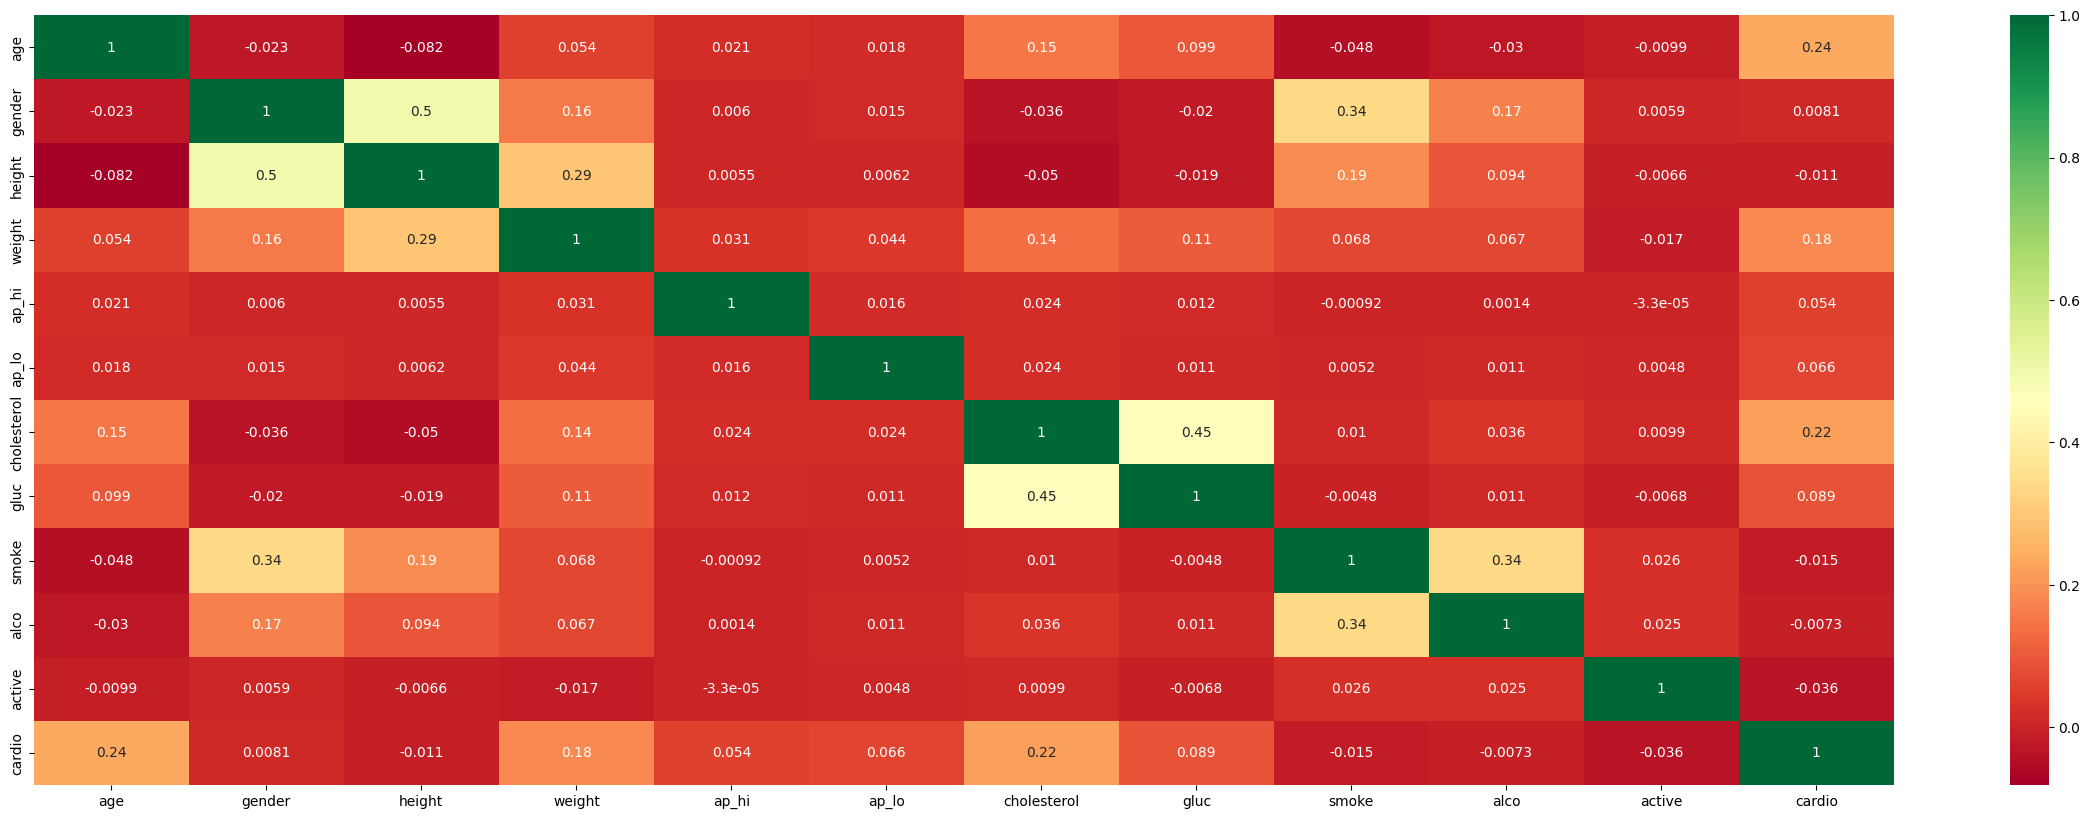

In [57]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap(df_cardio.corr(), annot=True, cmap="RdYlGn")

In [58]:
df_cardio.head(1)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0


In [59]:
Y = df_cardio["cardio"]
X = df_cardio.loc[:, df_cardio.columns != "cardio"]

In [60]:
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1
99995,22601,1,158,126.0,140,90,2,2,0,0,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0
99998,22431,1,163,72.0,135,80,1,2,0,0,0


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [63]:
from sklearn.ensemble import RandomForestClassifier

ml_model = RandomForestClassifier()
ml_model.fit(x_train, y_train)

RandomForestClassifier()

In [64]:
x_test.iloc[0]

,66728
age,21770.0
gender,1.0
height,156.0
weight,64.0
ap_hi,140.0
ap_lo,80.0
cholesterol,2.0
gluc,1.0
smoke,0.0
alco,0.0


In [65]:
ml_model.predict(x_test.iloc[0].values.reshape(1, -1))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([1])

In [66]:
y_test.iloc[0]

np.int64(1)

In [67]:
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
predictions = ml_model.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72     11506
           1       0.73      0.70      0.71     11594

    accuracy                           0.72     23100
   macro avg       0.72      0.72      0.72     23100
weighted avg       0.72      0.72      0.72     23100

[[8435 3071]
 [3454 8140]]


In [69]:
import shap

In [70]:
print(type(ml_model))
print(ml_model)


<class 'sklearn.ensemble._forest.RandomForestClassifier'>
RandomForestClassifier()


In [71]:
x_sample = x_test.sample(n=100, random_state=42)
explainer = shap.TreeExplainer(ml_model)
shap_values_sample = explainer.shap_values(x_sample)

print(type(shap_values_sample))
print([s.shape for s in shap_values_sample])


<class 'numpy.ndarray'>
[(11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2), (11, 2)]


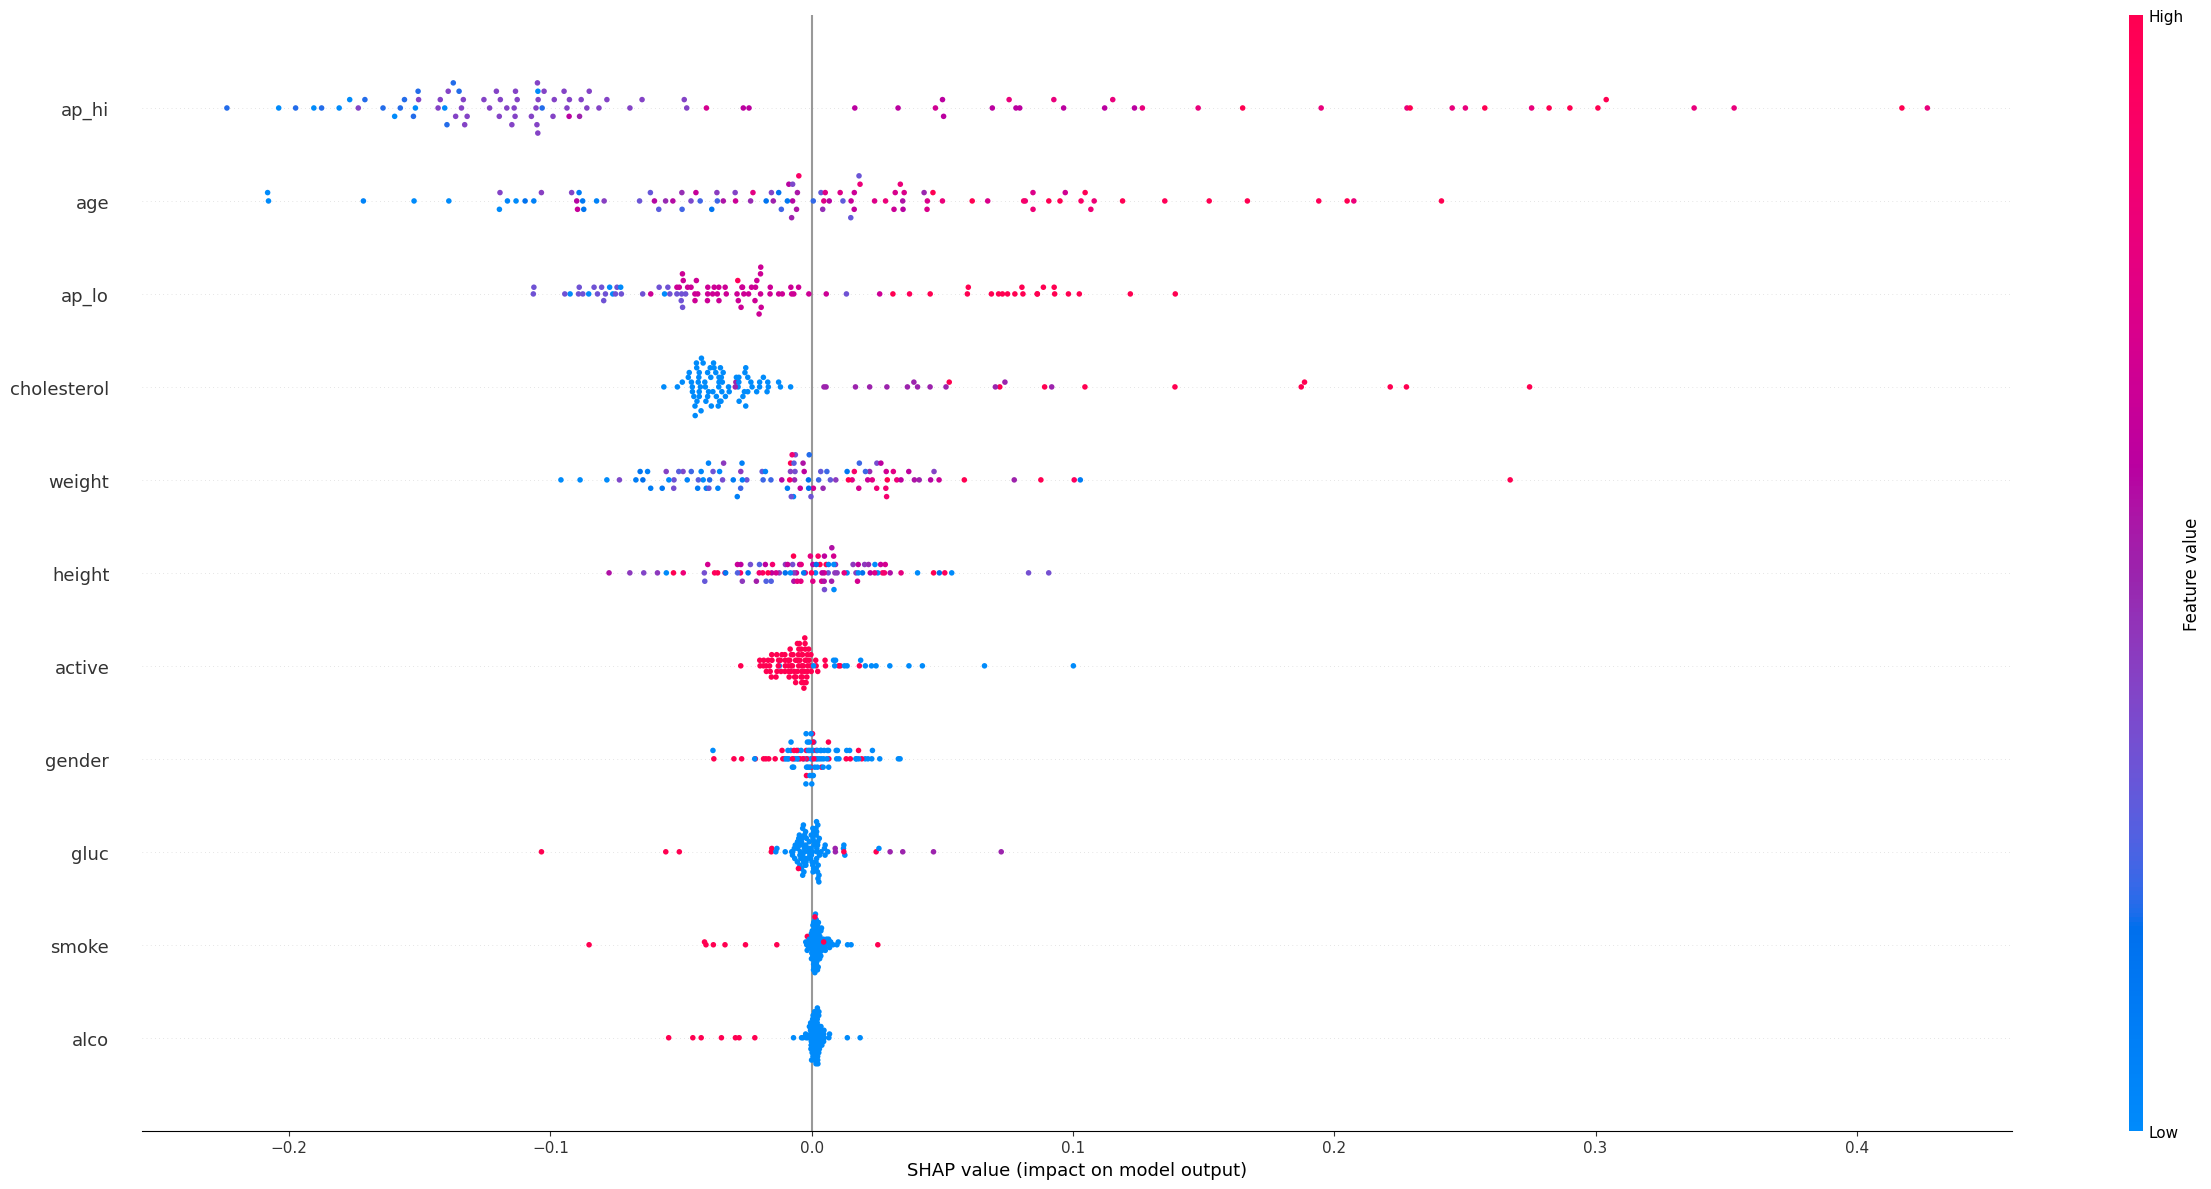

In [72]:
import numpy as np

# Empilha para (100, 11, 2)
shap_stacked = np.stack(shap_values_sample)

# Seleciona apenas a classe 1: (100, 11)
shap_class1 = shap_stacked[:, :, 1]

# Agora plota
shap.summary_plot(
    shap_class1,
    x_sample,
    feature_names=x_sample.columns,
    plot_size=(25, 12)
)


In [73]:
print("x_sample shape:", x_sample.shape)
print("shap_values[1] shape:", shap_values[1].shape)


x_sample shape: (100, 11)
shap_values[1] shape: (11, 2)


In [74]:
shap_stacked = np.stack(shap_values)

n = 2
shap_row_class1 = shap_stacked[n, :, 1]

shap.initjs()
shap.force_plot(
    explainer.expected_value[1],
    shap_row_class1,
    x_train.iloc[n]
)


In [75]:
y_train.iloc[n]

np.int64(1)